
## The Objective -

**the task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    


## Importing Necessary libraries -



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Exploring the Data -



In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

## Visualizing the Data

**Using matplotlib to view an image from the data set.**

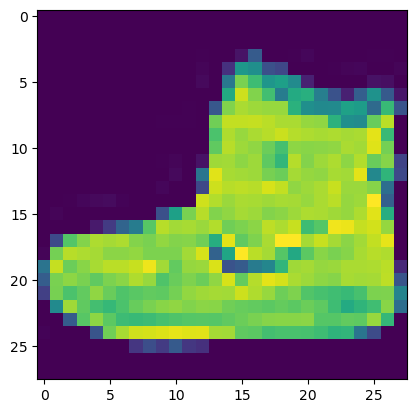

In [ ]:
plt.imshow(X_train[0])

## Preprocessing the Data

**Normalizing the X train and X test data by dividing by the max value of the image arrays.**

In [ ]:
X_train.max()

255

In [ ]:
X_train_norm = X_train/255
X_test_norm = X_test/255

**Reshape the X arrays to include 4 dimensions of the single channel.**

In [ ]:
X_test_norm.shape

(10000, 28, 28)

In [ ]:
X_train_norm.shape

(60000, 28, 28)

In [ ]:
X_test_norm = X_test_norm.reshape(10000, 28, 28,1)
X_train_norm = X_train_norm.reshape(60000, 28, 28, 1)

**Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train_cat = to_categorical(y_train)

In [ ]:
y_test_cat = to_categorical(y_test)

## Building the Model

**Using Keras to create a model consisting Convolution and pooling layer architecture**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(filters = 32,kernel_size = (4,4),activation = 'relu',input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(units = 128,activation = 'relu'))
model.add(Dense(units = 10,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 4608)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               589952    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

### Training the Model
**Train/Fit the model on the x_train set and also adding callback functionality**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss',patience = 2)

In [ ]:
model.fit(X_train_norm,y_train_cat,epochs =20,validation_data=(X_test_norm,y_test_cat),callbacks=[early_stop])

Epoch 1/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2884 - accuracy: 0.8952 - val_loss: 0.3128 - val_accuracy: 0.8876
Epoch 2/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2383 - accuracy: 0.9125 - val_loss: 0.2760 - val_accuracy: 0.9014
Epoch 3/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2048 - accuracy: 0.9235 - val_loss: 0.2543 - val_accuracy: 0.9107
Epoch 4/20
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1772 - accuracy: 0.9342 - val_loss: 0.2729 - val_accuracy: 0.9040
Epoch 5/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1527 - accuracy: 0.9439 - val_loss: 0.2592 - val_accuracy: 0.9131


### Evaluating the Model



In [ ]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

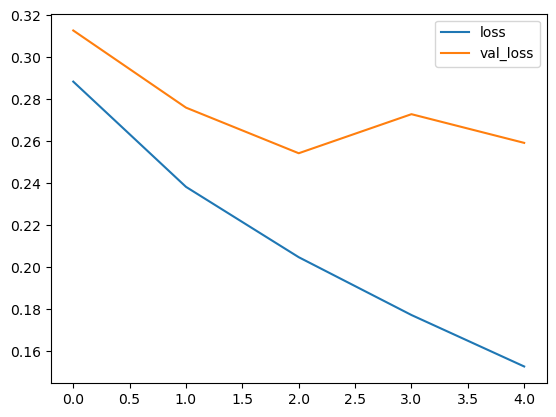

In [ ]:
metrics[['loss','val_loss']].plot()

<Axes: >

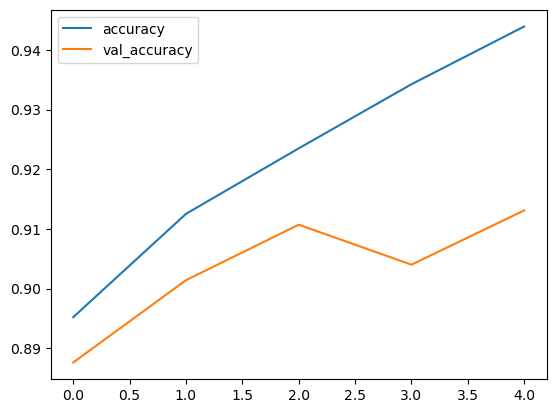

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

In [ ]:
model.evaluate(X_test_norm,y_test_cat)

313/313 [==============================] - 1s 4ms/step - loss: 0.2592 - accuracy: 0.9131


[0.25923800468444824, 0.913100004196167]

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

313/313 [==============================] - 1s 4ms/step


In [ ]:
print(classification_report(y_test_cat,predictions))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1000
           1       0.98      0.98      0.98      1000
           2       0.93      0.57      0.71      1000
           3       0.96      0.77      0.86      1000
           4       0.59      0.95      0.73      1000
           5       0.97      0.98      0.97      1000
           6       0.67      0.69      0.68      1000
           7       0.97      0.95      0.96      1000
           8       0.96      0.99      0.97      1000
           9       0.96      0.97      0.96      1000

   micro avg       0.87      0.87      0.87     10000
   macro avg       0.89      0.87      0.87     10000
weighted avg       0.89      0.87      0.87     10000
 samples avg       0.87      0.87      0.87     10000



### The model performed quite well in segregating different classes with an accuracy of 91%.